<a href="https://colab.research.google.com/github/neurobiologylab-umass/dlc-based-behavioral-analysis/blob/main/behavioral_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DLC-based Behavioral Analysis
### Analysis of the mouse's running status on the Rod
- load DLC labeled data to get the coordinates of rods and mouse's paws in all frames
- check whether mouse is running on a rod, slip off a rod or fall off a rod

        




      


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from google.colab import drive


#### Mount the Google Drive folder containing the data.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Settings and Utility Functions

In [ ]:
directory_path = "./drive/MyDrive/Data/deeplabcut/"
xlsx_file_name = "CollectedData_Ife.xls"
threshold_slip = -2
threshold_miss = -15

#figure setting
linewidth = 3
def getRodLine(dataframe):
  '''
  Select columns that start with 'rod' and then get the even-numbered 
  and odd-numbered columns for the x and y coordinates respectively.
  '''
  x = df.loc[:, df.columns.str.startswith('rod')].iloc[:, ::2].values.reshape(-1, 1)
  y = df.loc[:, df.columns.str.startswith('rod')].iloc[:, 1::2].values.reshape(-1, 1)
  
  # Fit a linear model to x and y to obtain a straight line of the rod.
  model = LinearRegression()
  model.fit(x,y)
  return model
  
def getStatus(x, y, linear_model):
  slope = linear_model.coef_[0]
  intercept = linear_model.intercept_
  y_on_line = slope*x + intercept
  distance = (y - y_on_line)[0]
  if  distance<= threshold_slip:
    if distance >= threshold_miss:
      return (distance, "slip")
    else:
      return (distance, "miss")
  else:
      return (distance, "good")

def behavior_plot(df):
    print(f"The mouse's front left paw fall past the slip threshold in {round((df_behavior['front_left.dist'] > threshold_slip).mean() * 100,3)}% of frames and the miss threshold in {round((df_behavior['front_left.dist'] > threshold_miss).mean() * 100, 3)}% of frames.")
    print(f"The mouse's front right paw fall past the slip threshold in {round((df_behavior['front_right.dist'] > threshold_slip).mean() * 100, 3)}% of frames and the miss threshold in {round((df_behavior['front_right.dist'] > threshold_miss).mean() * 100, 3)}% of frames.")
    print(f"The mouse's back left paw fall past the slip threshold in {round((df_behavior['back_left.dist'] > threshold_slip).mean() * 100, 3)}% of frames and the miss threshold in {round((df_behavior['back_left.dist'] > threshold_miss).mean() * 100, 3)}% of frames.")
    print(f"The mouse's back right paw fall past the slip threshold in {round((df_behavior['back_right.dist'] > threshold_slip).mean() * 100, 3)}% of frames and the miss threshold in {round((df_behavior['back_right.dist'] > threshold_miss).mean() * 100, 3)}% of frames.")
    fig, ax = plt.subplots(figsize=(25,4))
    sns.lineplot(x=df.index, y='front_left.dist', data=df, ax=ax, label='front_left', linewidth = linewidth, color = "#4B6D9A")
    sns.lineplot(x=df.index, y='front_right.dist', data=df, ax=ax, label='front_right', linewidth = linewidth, color = "#2A4B7C")
    sns.lineplot(x=df.index, y='back_left.dist', data=df, ax=ax, label='back_left', linewidth = linewidth, color = "#66c2a5")
    sns.lineplot(x=df.index, y='back_right.dist', data=df, ax=ax, label='back_right', linewidth = linewidth, color = "#2E8540")
    ax.set_title(f'Tracking the Behavior of a Mouse: Time Series Analysis')
    ax.set_xlabel('Frames')
    ax.set_ylabel('Distance between paw and rod line')
    ax.legend()
    ax.axhline(y=threshold_slip, color='#FF5733', linewidth = linewidth, linestyle='--')
    ax.axhline(y=threshold_miss, color='#C70039', linewidth = linewidth, linestyle='--')
    plt.show()

#### Load data & Data preprocessing




In [ ]:
file_path = os.path.join(directory_path, xlsx_file_name)
xlsx_file = pd.ExcelFile(file_path)
df = pd.read_excel(xlsx_file, header=1).dropna().iloc[:,3:].reset_index(drop=True)
df.head(n=5)

,frontpawleft,frontpawleft.1,frontpawright,frontpawright.1,backpawleft,backpawleft.1,backpawright,backpawright.1,rodone,rodone.1,rodtwo,rodtwo.1,rodthree,rodthree.1,rodfour,rodfour.1,rodfive,rodfive.1
0,879.737389,652.008012,655.405045,647.735015,1315.583086,797.289911,1089.114243,666.963501,1601.873887,673.372997,1274.989614,686.191988,903.238872,701.147478,563.535608,709.693472,202.467359,718.239466
1,1007.9273,707.556973,804.959941,675.509496,1048.520772,914.797329,1249.351632,694.737982,1473.683976,669.1,1129.707715,679.782493,755.820475,703.283976,386.206231,703.283976,57.18546,709.693472
2,1313.373644,522.501659,1258.695916,664.020485,1472.582323,615.775431,1419.512763,606.12642,1784.567007,647.9388,1464.541481,662.412317,1123.609764,670.453159,777.853542,689.751181,395.109445,691.359349
3,824.490428,643.114295,980.48277,691.359349,1279.602106,697.792023,1083.405552,639.897958,1827.987556,643.114295,1517.61104,654.371474,1168.638481,662.412317,824.490428,683.318507,448.179004,683.318507
4,810.016911,607.734588,591.305999,578.787556,1266.736758,787.849458,1044.809509,578.787556,1834.42023,582.003893,1503.137524,601.301914,1154.164965,607.734588,790.71889,620.599936,403.150287,631.857116


#### Calculate the distance between each paw and the rod line.

In [ ]:
linear_model_rod = getRodLine(df)
col_distances_status = ['front_left.dist','front_left.stat','front_right.dist','front_right.stat','back_left.dist','back_left.stat','back_right.dist','back_right.stat']
df[col_distances_status] = 0
df[["front_left.dist",'front_left.stat']] = df.apply(lambda row: getStatus(row["frontpawleft"], row["frontpawleft.1"], linear_model_rod), axis=1, result_type='expand')
df[["front_right.dist",'front_right.stat']] = df.apply(lambda row: getStatus(row["frontpawright"], row["frontpawright.1"], linear_model_rod), axis=1, result_type='expand')
df[["back_left.dist",'back_left.stat']] = df.apply(lambda row: getStatus(row["backpawleft"], row["backpawleft.1"], linear_model_rod), axis=1, result_type='expand')
df[["back_right.dist",'back_right.stat']] = df.apply(lambda row: getStatus(row["backpawright"], row["backpawright.1"], linear_model_rod), axis=1, result_type='expand')
df_behavior = df.loc[:,col_distances_status]
display(df_behavior)




,front_left.dist,front_left.stat,front_right.dist,front_right.stat,back_left.dist,back_left.stat,back_right.dist,back_right.stat
0,83.918822,good,73.185238,good,241.752717,good,104.904192,good
1,143.159547,good,105.266776,good,351.568961,good,137.293377,good
2,-33.099165,miss,106.844988,good,64.759685,good,53.582315,good
3,73.434038,good,126.171543,good,141.218607,good,77.674243,good
4,37.637506,good,2.391779,good,230.905530,good,15.452306,good
...,...,...,...,...,...,...,...,...
106,-72.811557,miss,-43.529307,miss,-76.888185,miss,-42.047360,miss
107,-67.197053,miss,-47.260185,miss,-65.890327,miss,-57.126538,miss
108,-64.230421,miss,-82.407647,miss,-53.697603,miss,-61.227414,miss
109,-74.819168,miss,-87.298972,miss,-130.779602,miss,-63.984407,miss


#### Plots

The mouse's front left paw fall past the slip threshold in 18.018% of frames and the miss threshold in 31.532% of frames.
The mouse's front right paw fall past the slip threshold in 6.306% of frames and the miss threshold in 12.613% of frames.
The mouse's back left paw fall past the slip threshold in 49.55% of frames and the miss threshold in 55.856% of frames.
The mouse's back right paw fall past the slip threshold in 27.928% of frames and the miss threshold in 35.135% of frames.


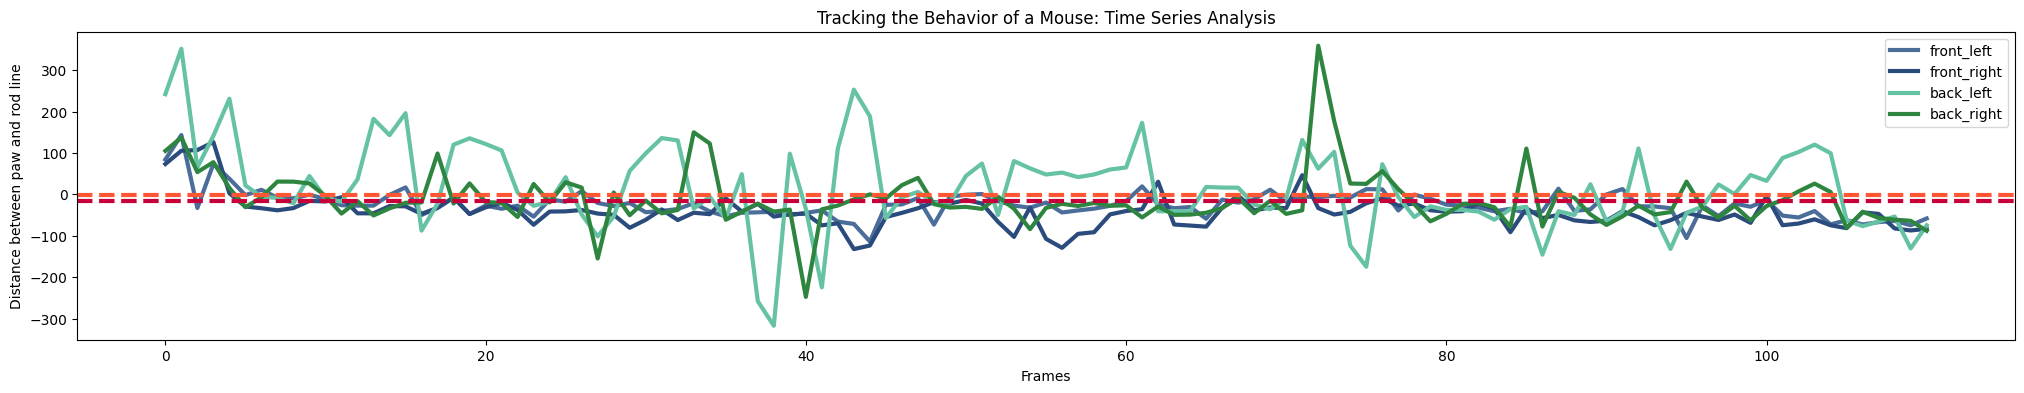

In [ ]:
behavior_plot(df_behavior)